# Lab 1: Tensor Manipulation

### View (Reshape)

In [2]:
import torch
import numpy as np

In [13]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],

              [[6, 7, 8],
               [9, 10, 11]]])

ft = torch.FloatTensor(t) # 2 by 2 by 3
print(ft.shape)

torch.Size([2, 2, 3])


In [11]:
print(ft.view([-1, 3]))
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [15]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


### Squeeze / Unsqueeze

In [34]:
ft = torch.FloatTensor([[0], [1], [2]])

print(ft)
print(ft.shape)

print(ft.squeeze()) # Dimension 
print(ft.squeeze().shape)

print("")

ft2 = torch.FloatTensor([[[0], [2]],
                         [[4], [6]]])
print(ft2.shape)

print(ft2.squeeze())
print(ft2.squeeze().shape)                        

# dimension 이 1인 경우를 없애준다!

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([0., 1., 2.])
torch.Size([3])

torch.Size([2, 2, 1])
tensor([[0., 2.],
        [4., 6.]])
torch.Size([2, 2])


In [43]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

print(ft.unsqueeze(dim=0)) #dimesion 0에 1을 넣어라!
print(ft.unsqueeze(dim=0).shape)


print(ft.view(1, -1))
print(ft.view(1, -1).shape)

print(ft.shape)
print(ft.unsqueeze(-1)) # dimension -1 (마지막 dimension : dim 1) 
print(ft.unsqueeze(-1).shape)

torch.Size([3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])
torch.Size([3])
tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


### Type Casting

In [44]:
lt = torch.LongTensor([[0], [1], [2], [0]])
print(lt)

tensor([[0],
        [1],
        [2],
        [0]])


In [45]:
print(lt.float())

tensor([[0.],
        [1.],
        [2.],
        [0.]])


In [46]:
bt = torch.ByteTensor([True, False, False])
print(bt)

# bt = (lt == 2)
# -> bt = (0, 0, 1, 0)

tensor([1, 0, 0], dtype=torch.uint8)


### Concatenate

In [47]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

# 2 by 2 행렬 2개를 이어붙이면?

In [50]:
print(torch.cat([x,y], dim=0))
print(torch.cat([x,y], dim=0).shape)

# dimension 0에 이어붙힌다!

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])


In [52]:
print(torch.cat([x, y], dim = 1))
print(torch.cat([x, y], dim = 1).shape)


tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])
torch.Size([2, 4])


### Stacking

In [61]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])
print(torch.stack([x, y, z])) #tensor 들 (length 2)을 3 by 2로 쌓게 됨 (dim = 0에 기본적으로 채움, 새로운 차원이니)
print(torch.stack([x, y, z], dim=1)) # 2 by 3 (열벡터 형식으로 [x, y, z])

print(x.shape)
print(x.unsqueeze(0).shape)

print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)]))

print(torch.cat([x.unsqueeze(1), y.unsqueeze(1), z.unsqueeze(1)], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2])
torch.Size([1, 2])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


### Ones and Zeros Like

In [62]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

print(torch.ones_like(x)) # 1로 행렬을 채움
print(torch.zeros_like(x)) # 0으로 행렬을 채움 


tensor([[0., 1., 2.],
        [2., 1., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


### In-place Operation

In [63]:
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2.))
print(x)
print(x.mul_(2.)) #inplace = T
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


# Lab 2: Linear Regression

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [65]:
# For reproducibility
torch.manual_seed(1)

In [66]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

In [67]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [68]:
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [92]:
#Weight 초기화

W = torch.zeros(1, requires_grad=True) # w, b 학습 시킬 것이라는 것을 알려줌
print(W)

b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


### Hypothesis

In [93]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [99]:
#오차 (MSE)
print(hypothesis - y_train)
print((hypothesis - y_train) ** 2) 
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor([[ 0.0186],
        [ 0.0040],
        [-0.0106]], grad_fn=<SubBackward0>)
tensor([[3.4597e-04],
        [1.5933e-05],
        [1.1272e-04]], grad_fn=<PowBackward0>)
tensor(0.0002, grad_fn=<MeanBackward0>)


In [96]:
optimizer = optim.SGD([W, b], lr=0.01)

In [97]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

In [91]:
print(W, b)

tensor([0.0933], requires_grad=True) tensor([0.0400], requires_grad=True)


In [98]:
# Full Model

# Data

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01) #SGD 기법을 사용

#SGD 기법이란 : 배치 크기가 1인 경사하강법 알고리즘

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad() #Gradient 초기화
    cost.backward() #backward gradient 계산
    optimizer.step() #step으로 w, b 개선

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))
        

Epoch    0/1000 W: 0.093, b: 0.040 Cost: 4.666667
Epoch  100/1000 W: 0.873, b: 0.289 Cost: 0.012043
Epoch  200/1000 W: 0.900, b: 0.227 Cost: 0.007442
Epoch  300/1000 W: 0.921, b: 0.179 Cost: 0.004598
Epoch  400/1000 W: 0.938, b: 0.140 Cost: 0.002842
Epoch  500/1000 W: 0.951, b: 0.110 Cost: 0.001756
Epoch  600/1000 W: 0.962, b: 0.087 Cost: 0.001085
Epoch  700/1000 W: 0.970, b: 0.068 Cost: 0.000670
Epoch  800/1000 W: 0.976, b: 0.054 Cost: 0.000414
Epoch  900/1000 W: 0.981, b: 0.042 Cost: 0.000256
Epoch 1000/1000 W: 0.985, b: 0.033 Cost: 0.000158


# Lab 2 - 1: Deeper Look at GD

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

경사 하강법을 이해하자!

In [102]:
# 1. x , y data

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

경사 하강법

cost(W) = MSE, 예측 함수 - 실제 y 값의 제곱의 평균

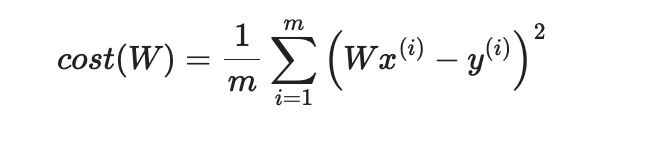

delta(W) = cost function을 W에 대해 미분한 것으로 기울기를 의미

만약 Gradient가 양수라면, W를 줄여야하고 반대의 경우는 W를 늘려야 하기 때문에 (Cost function 상에서)

W := W - lr * delta(W) (= gradient)


In [107]:
# 2. Create Model with GD

# 모델 초기화
W = torch.zeros(1)

# Learning Rate
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = 2 * torch.sum((W*x_train - y_train) * x_train) # Cost function의 W에 대한 편미분

    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), cost.item()
    ))
    
    W -= lr * gradient

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 2.800, Cost: 15.119998
Epoch    2/10 W: -2.240, Cost: 48.988800
Epoch    3/10 W: 6.832, Cost: 158.723755
Epoch    4/10 W: -9.498, Cost: 514.265076
Epoch    5/10 W: 19.896, Cost: 1666.218628
Epoch    6/10 W: -33.012, Cost: 5398.549316
Epoch    7/10 W: 62.222, Cost: 17491.300781
Epoch    8/10 W: -109.200, Cost: 56671.824219
Epoch    9/10 W: 199.359, Cost: 183616.734375
Epoch   10/10 W: -356.047, Cost: 594918.187500


In [106]:
torch.sum((W*x_train - y_train) * x_train)

tensor(0.0006)

# Lab 4-1: Multivariate Linear Regression

In [109]:
# 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [110]:
# 모델 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w3.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.297 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.676 w3: 0.676 b: 0.008 Cost: 1.563634
Epoch  200/1000 w1: 0.679 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.497607
Epoch  300/1000 w1: 0.684 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.435026
Epoch  400/1000 w1: 0.689 w2: 0.678 w3: 0.678 b: 0.008 Cost: 1.375730
Epoch  500/1000 w1: 0.694 w2: 0.678 w3: 0.678 b: 0.009 Cost: 1.319511
Epoch  600/1000 w1: 0.699 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.215696
Epoch  800/1000 w1: 0.709 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.167818
Epoch  900/1000 w1: 0.713 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.079378


###  Matrix 형태로 다중선형회귀모델을 작성한다면? 

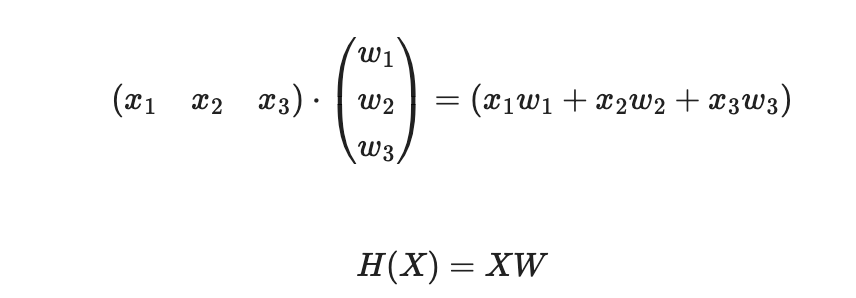

In [120]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

print(x_train.shape) # w1x1 + w2x2 + .... + w5x5 

print(x_train.matmul(torch.FloatTensor([[1], [2], [3]]))) # matrix mul
print(73 + 2*80 + 3*75)

torch.Size([5, 3])
tensor([[458.],
        [548.],
        [541.],
        [592.],
        [415.]])
458


In [123]:
# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train.matmul(W) + b # or .mm or @

    # cost 계산
    cost = F.mse_loss(hypothesis, y_train) # (Prediction Model, 실제 관측값)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) Cost: 9298.520508
Epoch    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) Cost: 2915.712891
Epoch    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) Cost: 915.040527
Epoch    4/20 hypothesis: tensor([137.7968, 165.6247, 163.1911, 177.7112, 126.3307]) Cost: 287.936005
Epoch    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) Cost: 91.371010
Epoch    6/20 hypothesis: tensor([148.1035, 178.0144, 175.3980, 191.0042, 135.7812]) Cost: 29.758139
Epoch    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8508, 193.6753, 137.6805]) Cost: 10.445305
Epoch    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) Cost: 4.391228
Epoch    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) Cost: 2.493135
Epoch   10/20 hypo

In [132]:
# class with nn.module 
import torch.nn as nn

class MultivariateLinearRegressionModel(nn.Module): # nn.Module 상속 받는 클래스 생성
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 변수가 3개이며 관측값이 1개인 다중 선형 회귀분석 모델 생성

    def forward(self, x):
        return self.linear(x)

In [144]:
MLR = MultivariateLinearRegressionModel() #초기화, 따라서 이 때 x_train 행렬을 넣으면 자동으로 prediction 생성

print(x_train)
coef = MLR(x_train)

print(coef) # Logic이 뭘까?

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
tensor([[-6.2552],
        [-3.5503],
        [-5.6530],
        [-5.0240],
        [-2.6179]], grad_fn=<AddmmBackward0>)


### 데이터가 크면 경사하강법이 부하가 크다.

-> minibatch gradient descent

Minibatch로 데이터를 나눈 다음, 각각의 minibatch의 cost를 구하고 이를 gradient descent를 진행

In [145]:
from torch.utils.data import Dataset

In [146]:
#1. Pytorch Dataset class 생성

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data =  [[152], [185], [180], [196], [142]]
    
    def __len__ (self):
        return(len(self.x_data))
    
    def __getitem__(self, index):
        x = torch.FloatTensor(self.x_data[index])
        y = torch.FloatTensor(self.y_data[index])
        return(x,y)

In [152]:
data = CustomDataset()

print(data.__getitem__(2))
print(data.__len__())


(tensor([89., 91., 90.]), tensor([180.]))
5


In [159]:
# data loader 생성

from torch.utils.data import DataLoader

dataloader = DataLoader(
    data,
    batch_size = 2,
    shuffle = True
)

# minibatch 사이즈 : 2 (보통 2의 제곱 수로 설정)
# shuffle : 데이터 학습 순서 섞어주기, 따라서 모델이 우리 데이터 셋의 순서를 알 수 없음


In [167]:
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [164]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    #print(batch_idx)
    print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))
    
#len(dataloader) : 한 epoch 당 minibatch의 개수

# 반복이 진행되는 동안 minibatch로 나누어진 집합들의 weight를 최적화하면서 Load를 줄인다!

[tensor([[93., 88., 93.],
        [73., 66., 70.]]), tensor([[185.],
        [142.]])]
Epoch    0/20 Batch 1/3 Cost: 20.210026
[tensor([[73., 80., 75.],
        [89., 91., 90.]]), tensor([[152.],
        [180.]])]
Epoch    0/20 Batch 2/3 Cost: 8.371478
[tensor([[ 96.,  98., 100.]]), tensor([[196.]])]
Epoch    0/20 Batch 3/3 Cost: 2.872067
[tensor([[73., 66., 70.],
        [89., 91., 90.]]), tensor([[142.],
        [180.]])]
Epoch    1/20 Batch 1/3 Cost: 13.964349
[tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]]), tensor([[152.],
        [196.]])]
Epoch    1/20 Batch 2/3 Cost: 4.539025
[tensor([[93., 88., 93.]]), tensor([[185.]])]
Epoch    1/20 Batch 3/3 Cost: 16.378061
[tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]]), tensor([[152.],
        [196.]])]
Epoch    2/20 Batch 1/3 Cost: 9.626887
[tensor([[73., 66., 70.],
        [93., 88., 93.]]), tensor([[142.],
        [185.]])]
Epoch    2/20 Batch 2/3 Cost: 17.824505
[tensor([[89., 91., 90.]]), tensor([[180.]])]
Epoch    